In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

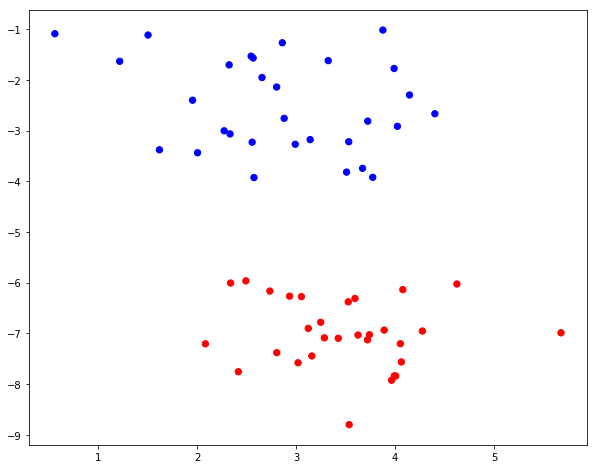

In [2]:
from sklearn.datasets import samples_generator

x, y = samples_generator.make_blobs(n_samples=60, centers=2, random_state=30, cluster_std=0.8) # 生成示例数据

plt.figure(figsize=(10, 8)) # 绘图
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='bwr')

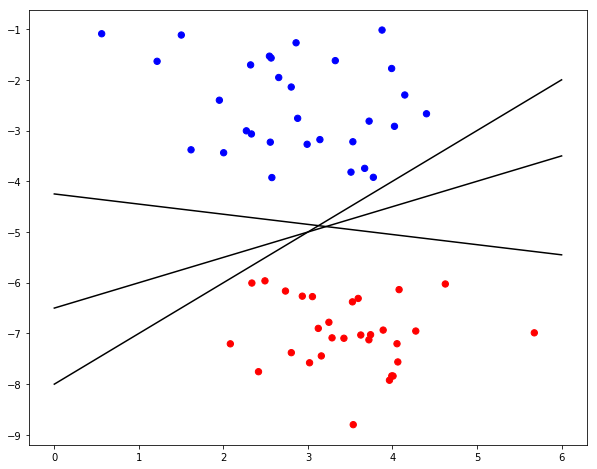

In [3]:
plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='bwr')

# 绘制 3 条不同的分割线
x_temp = np.linspace(0, 6)
for m, b in [(1, -8), (0.5, -6.5), (-0.2, -4.25)]:
    y_temp = m * x_temp + b
    plt.plot(x_temp, y_temp, '-k')

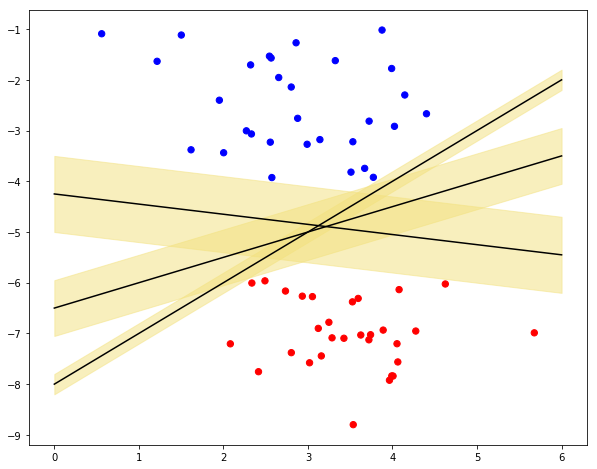

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='bwr')

# 绘制 3 条不同的分割线
x_temp = np.linspace(0, 6)
for m, b, d in [(1, -8, 0.2), (0.5, -6.5, 0.55), (-0.2, -4.25, 0.75)]:
    y_temp = m * x_temp + b
    plt.plot(x_temp, y_temp, '-k')
    plt.fill_between(x_temp, y_temp - d, y_temp + d, color='#f3e17d', alpha=0.5)

In [5]:
from sklearn.svm import SVC

linear_svc = SVC(kernel='linear')
linear_svc.fit(x, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
linear_svc.support_vectors_

array([[ 2.57325754, -3.92687452],
       [ 2.49156506, -5.96321164],
       [ 4.62473719, -6.02504452]])

In [7]:
def svc_plot(model):
    
    # 获取到当前 Axes 子图数据，并为绘制分割线做准备
    ax = plt.gca()
    x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 50)
    y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 50)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # 使用轮廓线方法绘制分割线
    ax.contour(X, Y, P, colors='green', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    
    # 标记出支持向量的位置
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], c='green', s=100)

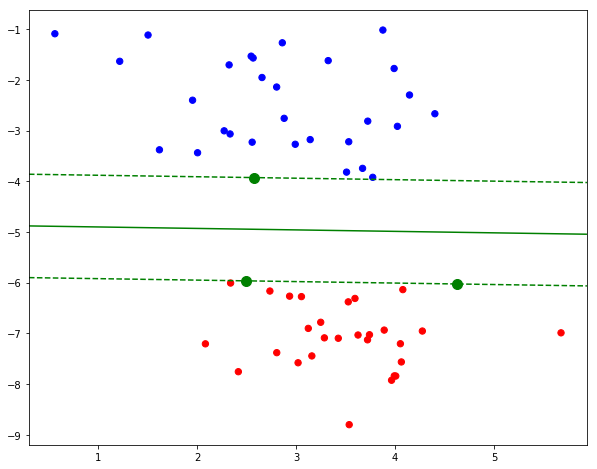

In [8]:
# 绘制最大间隔支持向量图
plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='bwr')
svc_plot(linear_svc)

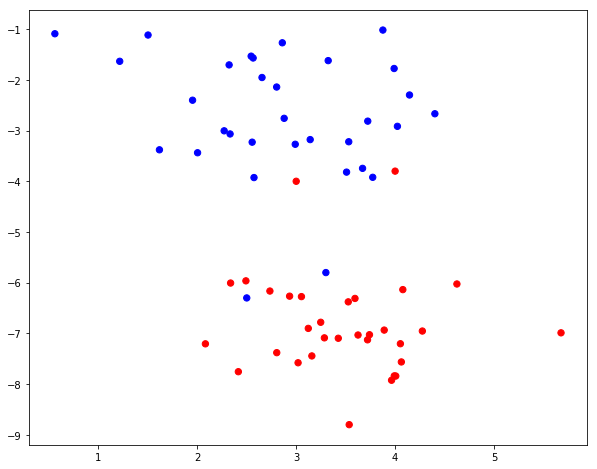

In [9]:
# 向原数据集中加入噪声点
x = np.concatenate((x, np.array([[3, -4], [4, -3.8], [2.5, -6.3], [3.3, -5.8]])))
y = np.concatenate((y, np.array([1, 1, 0, 0])))

plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='bwr')

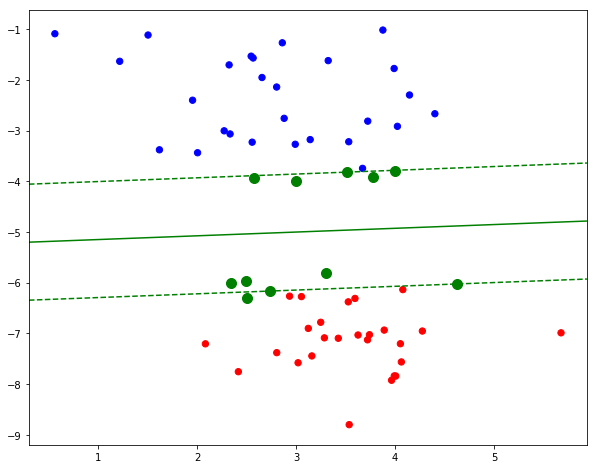

In [10]:
linear_svc.fit(x, y) # 训练

# 绘图
plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='bwr')
svc_plot(linear_svc)

In [11]:
from ipywidgets import interact
import ipywidgets as widgets

def change_c(c):
    linear_svc.C = c
    linear_svc.fit(x, y)
    plt.figure(figsize=(10, 8))
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='bwr')
    svc_plot(linear_svc)
    
interact(change_c, c=[1, 10000, 1000000])

interactive(children=(Dropdown(description='c', options=(1, 10000, 1000000), value=1), Output()), _dom_classes=('widget-interact',))

<function __main__.change_c>

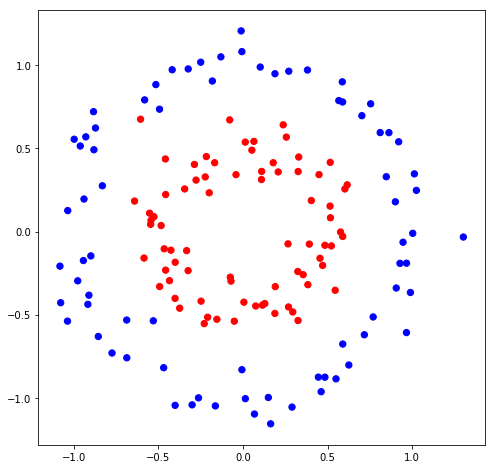

In [12]:
x2, y2 = samples_generator.make_circles(150, factor=.5, noise=.1, random_state=30) # 生成示例数据

plt.figure(figsize=(8, 8)) # 绘图
plt.scatter(x2[:, 0], x2[:, 1], c=y2, s=40, cmap='bwr')

In [13]:
def kernel_function(xi, xj):
    poly = xi**2 + xj**2
    return poly

Text(0.5,0,'r')

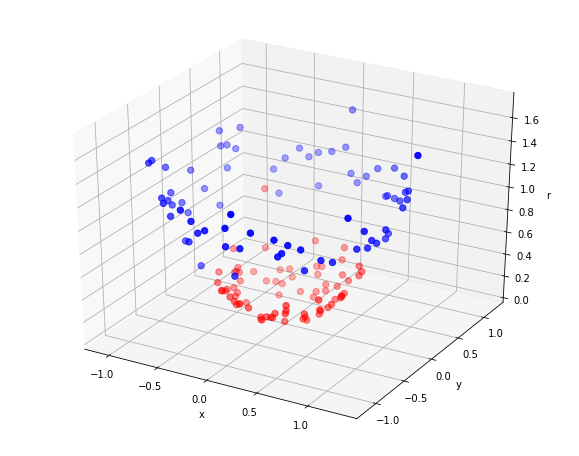

In [14]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

r = kernel_function(x2[:,0], x2[:,1])
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection='3d')
ax.scatter3D(x2[:, 0], x2[:, 1], r, c=y2, s=40, cmap='bwr')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

In [15]:
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(x2, y2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

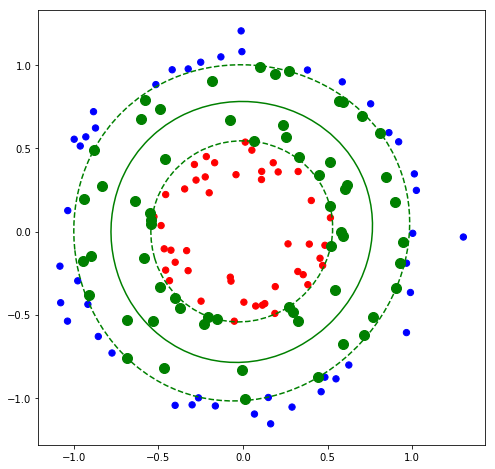

In [16]:
plt.figure(figsize=(8, 8))
plt.scatter(x2[:, 0], x2[:, 1], c=y2, s=40, cmap='bwr')

svc_plot(rbf_svc)

In [17]:
def change_c(c):
    rbf_svc.C = c
    rbf_svc.fit(x2, y2)
    plt.figure(figsize=(8, 8))
    plt.scatter(x2[:, 0], x2[:, 1], c=y2, s=40, cmap='bwr')
    svc_plot(rbf_svc)
    
interact(change_c, c=[1, 100, 10000])

interactive(children=(Dropdown(description='c', options=(1, 100, 10000), value=1), Output()), _dom_classes=('widget-interact',))

<function __main__.change_c>